In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
df.shape

(12294, 7)

In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
df_new=df.dropna()
df_new

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [7]:
df_new.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [9]:
len(df_new['name'].unique())

12015

In [10]:
len(df_new['type'].unique())

6

In [22]:
a=df_new.groupby('type')['rating'].mean()
a.sort_values(ascending=True)

type
Music      5.588996
ONA        5.650293
Movie      6.334055
OVA        6.375411
Special    6.523126
TV         6.903321
Name: rating, dtype: float64

In [24]:
b=df_new.groupby('genre')['members'].mean()
b.sort_values(ascending=False)

genre
Action, Adventure, Drama, Fantasy, Magic, Military, Shounen            793665.0
Action, Comedy, Drama, School, Supernatural                            717796.0
Action, Mecha, Military, School, Sci-Fi, Super Power                   715151.0
Action, Mystery, Psychological, Shounen, Supernatural, Thriller        657190.0
Action, Drama, Horror, Psychological, Romance, Seinen, Supernatural    623511.0
                                                                         ...   
Demons, Fantasy, Historical, Kids, Magic, Samurai, Supernatural            36.0
Drama, Kids, Sports                                                        35.0
Adventure, Fantasy, Kids, Magic, Martial Arts                              35.0
Game, Shounen, Supernatural                                                34.0
Adventure, Kids, Mecha                                                     24.0
Name: members, Length: 3229, dtype: float64

In [25]:
df_new.groupby('type')['rating'].count()

type
Movie      2259
Music       488
ONA         648
OVA        3284
Special    1670
TV         3668
Name: rating, dtype: int64

In [26]:
df_new.groupby('genre')['rating'].count()

genre
Action                                                     53
Action, Adventure                                          15
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen            2
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports     1
Action, Adventure, Cars, Sci-Fi                             1
                                                           ..
Super Power, Supernatural, Vampire                          1
Supernatural                                               14
Thriller                                                    1
Vampire                                                     1
Yaoi                                                        2
Name: rating, Length: 3229, dtype: int64

In [40]:
pt=df_new.pivot_table(index='anime_id',columns='genre',values='rating')
pt

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
pt.fillna(0,inplace=True)
pt


genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
pt.head()

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
pt.tail()

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
34476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
pt.shape

(12017, 3229)

In [50]:
c=cosine_similarity(pt)
c

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [52]:
df1=pd.DataFrame(c)
df1

,0,1,2,3,4,5,6,7,8,9,...,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
12014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
12015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
df1.new_rows=df_new.anime_id.unique()
df1.new_columns=df_new.anime_id.unique()

In [60]:
df1


,0,1,2,3,4,5,6,7,8,9,...,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
12014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
12015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
df1.idxmax()

0            0
1            1
2            2
3            3
4            4
         ...  
12012      574
12013      455
12014      455
12015    12015
12016      455
Length: 12017, dtype: int64

In [68]:
np.fill_diagonal(c,0)

In [69]:
df1

,0,1,2,3,4,5,6,7,8,9,...,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df1.idxmax()

0        3455
1           0
2        1917
3           0
4         576
         ... 
12012     574
12013     455
12014     455
12015       0
12016     455
Length: 12017, dtype: int64

In [71]:
df1.idxmax()[0:11]

0      3455
1         0
2      1917
3         0
4       576
5       900
6         0
7     10587
8       162
9         0
10     1574
dtype: int64

In [72]:
df1.idxmax()[12005:12017]

12005    3982
12006      18
12007    1785
12008    9383
12009    1764
12010     359
12011    1974
12012     574
12013     455
12014     455
12015       0
12016     455
dtype: int64

In [76]:
df[(df.anime_id==1) | (df.anime_id==455)]

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1114,455,Fantastic Children,"Adventure, Fantasy, Mystery, Romance, Sci-Fi",TV,26,7.67,17773


In [83]:
df[(df.anime_id==2) | (df.anime_id==200)]

,anime_id,name,genre,type,episodes,rating,members
1302,200,Tenshi na Konamaiki,"Comedy, Magic, Romance, Shounen",TV,50,7.6,15077


In [84]:
df[(df.anime_id==5) | (df.anime_id==900)]

,anime_id,name,genre,type,episodes,rating,members
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
2874,900,Dragon Ball Z Movie 07: Kyokugen Battle!! Sand...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",Movie,1,7.14,52690


In [85]:
df[(df.anime_id==17005) | (df.anime_id==3982)]

,anime_id,name,genre,type,episodes,rating,members
11889,3982,Kairaku Satsujin Chousakan Kouji,Hentai,OVA,3,5.94,694


In [86]:
df[(df.anime_id==8) | (df.anime_id==162)]

,anime_id,name,genre,type,episodes,rating,members
3108,162,Pita Ten,"Comedy, Fantasy, Kids, Romance, School, Shounen",TV,26,7.08,16047
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


In [101]:
df[(df.anime_id==12010) | (df.anime_id==359)]

,anime_id,name,genre,type,episodes,rating,members
5209,359,I&#039;ll/CKBC,"Action, School, Shounen, Sports",OVA,2,6.52,3425


In [90]:
df[(df.anime_id==6) | (df.anime_id==25)]

,anime_id,name,genre,type,episodes,rating,members
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
1432,25,Sunabouzu,"Action, Adventure, Comedy, Ecchi, Sci-Fi, Shounen",TV,24,7.55,65516


In [91]:
from sklearn.metrics import pairwise_distances

In [93]:
pair=pairwise_distances(df1,metric='euclidean')

In [94]:
pair

array([[ 0.        ,  1.        ,  3.        , ..., 22.82542442,
         1.        , 22.82542442],
       [ 1.        ,  0.        ,  2.82842712, ..., 22.8035085 ,
         0.        , 22.8035085 ],
       [ 3.        ,  2.82842712,  0.        , ..., 22.97825059,
         2.82842712, 22.97825059],
       ...,
       [22.82542442, 22.8035085 , 22.97825059, ...,  0.        ,
        22.8035085 ,  1.41421356],
       [ 1.        ,  0.        ,  2.82842712, ..., 22.8035085 ,
         0.        , 22.8035085 ],
       [22.82542442, 22.8035085 , 22.97825059, ...,  1.41421356,
        22.8035085 ,  0.        ]])

In [97]:
pair1=pairwise_distances(pt,metric='cosine')

In [98]:
pair1

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 0., 1., 0.]])

In [99]:
df_new

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [103]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [104]:
target=df_new['type']
target

0        Movie
1           TV
2           TV
3           TV
4           TV
         ...  
12289      OVA
12290      OVA
12291      OVA
12292      OVA
12293    Movie
Name: type, Length: 12017, dtype: object

In [105]:
a=df_new.drop('type',axis=1)
a

,anime_id,name,genre,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.16,151266
...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,1,4.15,211
12290,5543,Under World,Hentai,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,1,4.98,175


In [107]:
feature=pd.get_dummies(data=a)
feature

,anime_id,rating,members,name_&quot;0&quot;,"name_&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",name_&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,name_&quot;Bungaku Shoujo&quot; Memoire,name_&quot;Bungaku Shoujo&quot; Movie,name_&quot;Eiji&quot;,name_&quot;Eiyuu&quot; Kaitai,...,episodes_91,episodes_92,episodes_93,episodes_94,episodes_95,episodes_96,episodes_97,episodes_98,episodes_99,episodes_Unknown
0,32281,9.37,200630,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,9.26,793665,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,9.25,114262,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,9.17,673572,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,9.16,151266,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,4.15,211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,4.28,183,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,4.88,219,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,4.98,175,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=100)

In [110]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 15434)
(2404, 15434)
(9613,)
(2404,)


In [111]:
dec_tree=DecisionTreeClassifier(max_depth=5)

In [112]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [113]:
y_pred=dec_tree.predict(x_test)

In [114]:
y_pred

array(['TV', 'Movie', 'OVA', ..., 'Movie', 'Movie', 'Music'], dtype=object)

In [115]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,confusion_matrix,classification_report

In [116]:
accuracy_score(y_test,y_pred)

0.6792845257903494

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Movie       0.46      0.97      0.63       460
       Music       0.89      0.71      0.79       108
         ONA       0.00      0.00      0.00       128
         OVA       0.77      0.57      0.65       653
     Special       0.65      0.06      0.11       328
          TV       0.86      0.99      0.92       727

    accuracy                           0.68      2404
   macro avg       0.60      0.55      0.52      2404
weighted avg       0.68      0.68      0.63      2404



C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
confusion_matrix(y_test,y_pred)

array([[447,   6,   0,   2,   1,   4],
       [ 29,  77,   0,   0,   1,   1],
       [ 59,   1,   0,  25,   3,  40],
       [232,   1,   0, 370,   6,  44],
       [200,   2,   0,  76,  20,  30],
       [  0,   0,   0,   8,   0, 719]], dtype=int64)

In [119]:
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
print('Precision:',precision)
print('Recall:',recall)
print('f1_score:',f1_score)

Precision: [0.4622544  0.88505747 0.         0.76923077 0.64516129 0.85799523]
Recall: [0.97173913 0.71296296 0.         0.56661562 0.06097561 0.98899587]
f1_score: [0.62648914 0.78974359 0.         0.65255732 0.11142061 0.91884984]


[Text(0.5683962264150944, 0.9166666666666666, 'X[15247] <= 0.5\ngini = 0.772\nsamples = 9613\nvalue = [1799, 380, 520, 2631, 1342, 2941]'),
 Text(0.3018867924528302, 0.75, 'X[15319] <= 0.5\ngini = 0.59\nsamples = 5172\nvalue = [25, 11, 296, 1406, 493, 2941]'),
 Text(0.1509433962264151, 0.5833333333333334, 'X[15345] <= 0.5\ngini = 0.497\nsamples = 4323\nvalue = [19, 7, 266, 756, 335, 2940]'),
 Text(0.07547169811320754, 0.4166666666666667, 'X[15365] <= 0.5\ngini = 0.414\nsamples = 3904\nvalue = [12, 7, 242, 455, 255, 2933]'),
 Text(0.03773584905660377, 0.25, 'X[15389] <= 0.5\ngini = 0.347\nsamples = 3644\nvalue = [10, 5, 224, 287, 202, 2916]'),
 Text(0.018867924528301886, 0.08333333333333333, 'gini = 0.279\nsamples = 3437\nvalue = [9, 5, 202, 187, 132, 2902]'),
 Text(0.05660377358490566, 0.08333333333333333, 'gini = 0.636\nsamples = 207\nvalue = [1, 0, 22, 100, 70, 14]'),
 Text(0.11320754716981132, 0.25, 'X[0] <= 6877.0\ngini = 0.532\nsamples = 260\nvalue = [2, 2, 18, 168, 53, 17]'),
 Te

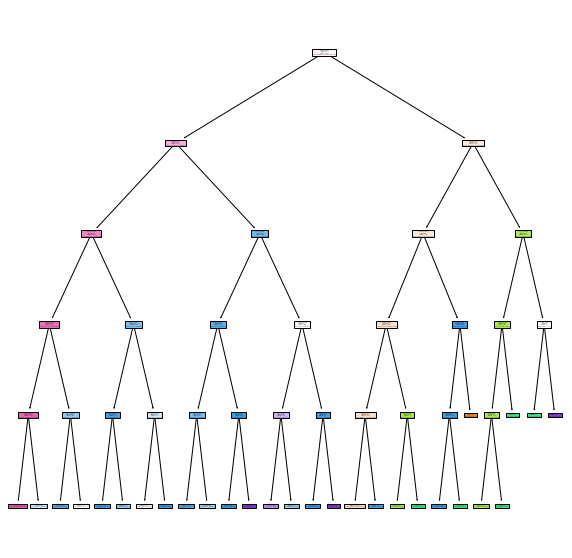

In [124]:
fig=plt.figure(figsize=(10,10))
plot_tree(dec_tree,filled=True)